# Homework task week 2 

Do some task with example sales data.

1. a. Read-in "umsatzdaten_gekuerzt.csv" dataset into panda data frame

In [6]:
import pandas as pd

# Load the sales dataset
sales_file_path = '../example_data/umsatzdaten_gekuerzt.csv'
sales_data = pd.read_csv(sales_file_path)

# Convert 'Datum' to datetime type to handle data selection better
sales_data['Datum'] = pd.to_datetime(sales_data['Datum'])

# show prove that we got the right data file
print(sales_data.head())

       Datum  Warengruppe      Umsatz
0 2013-07-01            1  148.828353
1 2013-07-02            1  159.793757
2 2013-07-03            1  111.885594
3 2013-07-04            1  168.864941
4 2013-07-05            1  171.280754


1. b. Uses a bar chart to show the relationship between average sales per day of the week. 

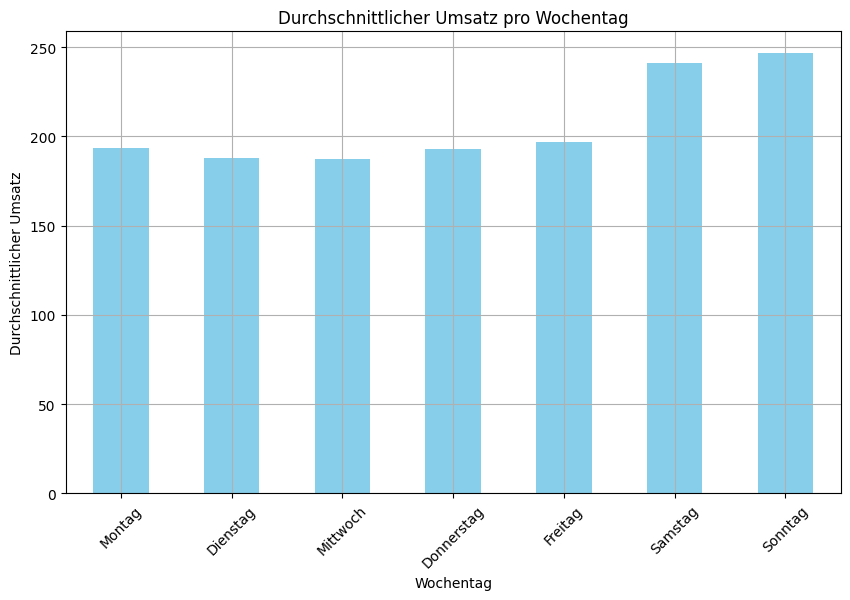

In [18]:
# we use mathplot for visualization
import matplotlib.pyplot as plt

# to prevent later mix of english and german in data, convert daynames form "en" to "de"
day_name_map = {
    'Monday': 'Montag', 'Tuesday': 'Dienstag', 'Wednesday': 'Mittwoch', 
    'Thursday': 'Donnerstag', 'Friday': 'Freitag', 'Saturday': 'Samstag', 'Sunday': 'Sonntag'
}

# add (english) weekday to sales data and map them, because of no german locale on github codespace
sales_data['Wochentag'] = sales_data['Datum'].dt.day_name().map(day_name_map)

# calculate the avarage sales per weekday 
# and use reindex to sort the weekdays in "human" order
weekly_sales_data = sales_data.groupby('Wochentag')['Umsatz'].mean().reindex([
    'Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'
], fill_value=0)


# Plot the data in bargraph
plt.figure(figsize=(10, 6))
weekly_sales_data.plot(kind='bar', color='skyblue')
plt.title('Durchschnittlicher Umsatz pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

2. In a second step, add additional confidence intervals for sales on each day of the week.

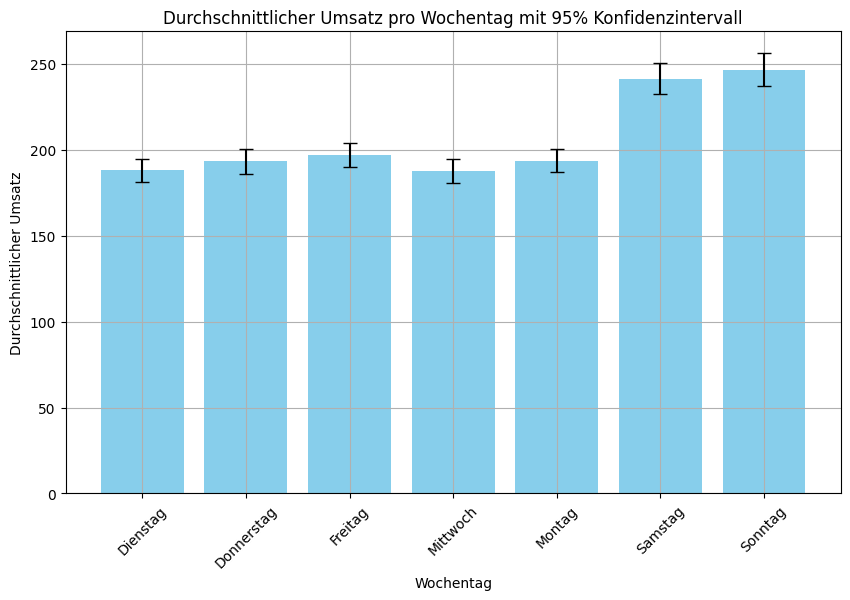

In [17]:
import numpy as np

# by weekday and create needed values to calculate the 
weekly_sales_data_with_ci = sales_data.groupby('Wochentag')['Umsatz'].agg(['mean', 'std', 'count'])

# calculate standard deviation
weekly_sales_data_with_ci['se'] = weekly_sales_data_with_ci['std'] / np.sqrt(weekly_sales_data_with_ci['count'])  # standard error

# calculate confidence interval at 95%
weekly_sales_data_with_ci['ci95'] = 1.96 * weekly_sales_data_with_ci['se']

# draw the diagram
plt.figure(figsize=(10, 6))
plt.bar(weekly_sales_data_with_ci.index, weekly_sales_data_with_ci['mean'], yerr=weekly_sales_data_with_ci['ci95'], capsize=5, color='skyblue')
plt.title('Durchschnittlicher Umsatz pro Wochentag mit 95% Konfidenzintervall')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()